In [2]:
import requests as req
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import re
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as m


In [3]:
rank=[];influencer_name=[];category=[];followers=[];country=[];avg_likes=[];avg_views=[];avg_comments=[]
for i in range(1,11):
    url=f'https://hypeauditor.com/top-youtube-all-india/?p={i}'
    page=req.get(url)
    soup=bs(page.text)
    a=soup.find_all('div',class_='row-cell rank')
    for i in a:
        rank.append(i.text)
    b=soup.find_all('div',class_='contributor__name-content')
    for i in b:
        influencer_name.append(i.text)
    c=soup.find_all('div',class_='row-cell category')
    for i in c:
        z=i.text
        if z:
            category.append(z)
        else:
            category.append(np.nan)
    d=soup.find_all('div',class_='row-cell subscribers')
    for i in d:
        followers.append(i.text) 
    e=soup.find_all('div',class_='row-cell audience')
    for i in e:
        country.append(i.text) 
    f=soup.find_all('div',class_='row-cell avg-views')
    for i in f:
        avg_views.append(i.text) 
    g=soup.find_all('div',class_='row-cell avg-likes')
    for i in g:
        avg_likes.append(i.text)
    h=soup.find_all('div',class_='row-cell avg-comments')
    for i in h:
        avg_comments.append(i.text) 
    
        

In [4]:
data=pd.DataFrame({'Rank':rank,'Youtube Channel':influencer_name,'Content_Category':category,'Subscribers':followers,'Indian Subscribers':country,'Avg-views':avg_views,'Avg-likes':avg_likes,'Avg-Comments':avg_comments})

In [5]:
data.to_csv('TopYoutubers.csv')

In [6]:
data=pd.read_csv('TopYoutubers.csv')
data.rename(columns={'Influencer':'Youtube channel','Subscribers':'Subscribers(M)','Indian Subscribers':'Indian Subscribers(M)','Avg-views':'Avg-views'},inplace=True)
data

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1M,193.9M,57K,1.6K,70
1,1,2,SETIndia,NaN,153.5M,118.4M,21.1K,215,13
2,2,3,zeemusiccompany,Music & Dance,93.7M,76.3M,64.9K,2.2K,55
3,3,4,GoldminesTelefilms,NaN,83.6M,68.1M,58.2K,723,21
4,4,5,5MinuteCraftsYouTube,NaN,79.4M,22.1M,245.2K,1.5K,56
...,...,...,...,...,...,...,...,...,...
495,495,496,areyouhungry3512,Daily vlogs,6.5M,5.9M,390.9K,39.7K,177
496,496,497,Sunnewstamil,News & Politics,6.5M,5.8M,6.4K,63,4
497,497,498,SaregamaTVShowsTamil,NaN,6.4M,5.4M,202.9K,3.5K,41
498,498,499,REresearch,Education,6.4M,5.6M,204K,5.2K,292


### Data Cleaning

In [7]:
data['Subscribers(M)']=data['Subscribers(M)'].replace('M','',regex=True).map(pd.eval)
data['Indian Subscribers(M)']=data['Indian Subscribers(M)'].replace('M','',regex=True).map(pd.eval)
data['Avg-views']=data['Avg-views'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval)
data['Avg-likes']=data['Avg-likes'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval)
data['Avg-Comments']=data['Avg-Comments'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval)

In [8]:
data.fillna(method='bfill',inplace=True)

### data (after cleaning)

In [9]:
data

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,1,2,SETIndia,Music & Dance,153.5,118.4,21100.0,215.0,13.0
2,2,3,zeemusiccompany,Music & Dance,93.7,76.3,64900.0,2200.0,55.0
3,3,4,GoldminesTelefilms,MoviesAnimation,83.6,68.1,58200.0,723.0,21.0
4,4,5,5MinuteCraftsYouTube,MoviesAnimation,79.4,22.1,245200.0,1500.0,56.0
...,...,...,...,...,...,...,...,...,...
495,495,496,areyouhungry3512,Daily vlogs,6.5,5.9,390900.0,39700.0,177.0
496,496,497,Sunnewstamil,News & Politics,6.5,5.8,6400.0,63.0,4.0
497,497,498,SaregamaTVShowsTamil,Education,6.4,5.4,202900.0,3500.0,41.0
498,498,499,REresearch,Education,6.4,5.6,204000.0,5200.0,292.0


In [10]:
data.dtypes

Unnamed: 0                 int64
Rank                       int64
Youtube Channel           object
Content_Category          object
Subscribers(M)           float64
Indian Subscribers(M)    float64
Avg-views                float64
Avg-likes                float64
Avg-Comments             float64
dtype: object

### Data Analysis

In [11]:
data

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,1,2,SETIndia,Music & Dance,153.5,118.4,21100.0,215.0,13.0
2,2,3,zeemusiccompany,Music & Dance,93.7,76.3,64900.0,2200.0,55.0
3,3,4,GoldminesTelefilms,MoviesAnimation,83.6,68.1,58200.0,723.0,21.0
4,4,5,5MinuteCraftsYouTube,MoviesAnimation,79.4,22.1,245200.0,1500.0,56.0
...,...,...,...,...,...,...,...,...,...
495,495,496,areyouhungry3512,Daily vlogs,6.5,5.9,390900.0,39700.0,177.0
496,496,497,Sunnewstamil,News & Politics,6.5,5.8,6400.0,63.0,4.0
497,497,498,SaregamaTVShowsTamil,Education,6.4,5.4,202900.0,3500.0,41.0
498,498,499,REresearch,Education,6.4,5.6,204000.0,5200.0,292.0


In [12]:
data['Subscribers(M)'].describe()

count    500.000000
mean      14.546200
std       16.476598
min        6.400000
25%        7.600000
50%       10.150000
75%       14.625000
max      239.100000
Name: Subscribers(M), dtype: float64

C:\ProgramData\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

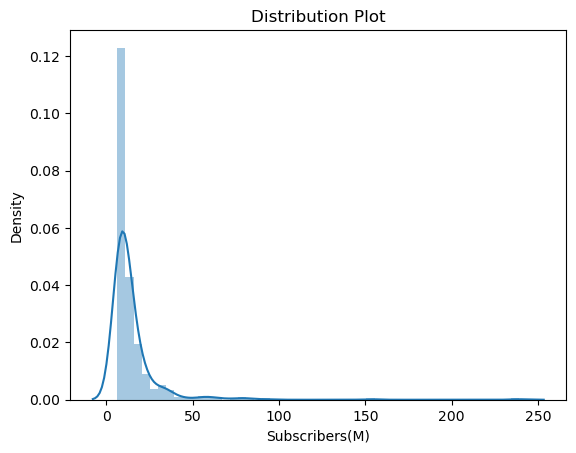

In [14]:
s.distplot(data['Subscribers(M)'])
m.title('Distribution Plot')


C:\ProgramData\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


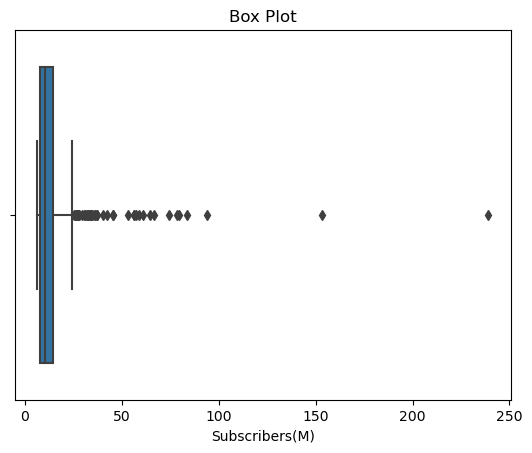

In [15]:
s.boxplot(data['Subscribers(M)'])
m.title('Box Plot')
m.show()

### Subscribers Count

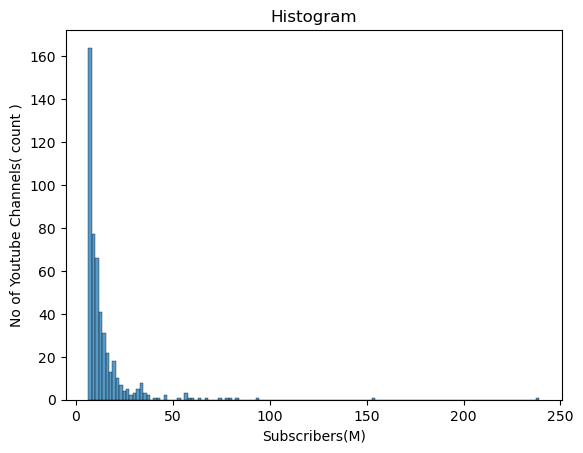

In [16]:
s.histplot(data['Subscribers(M)'])
m.title('Histogram')
m.ylabel('No of Youtube Channels( count )')
m.show()

### Indian Subscribers Count

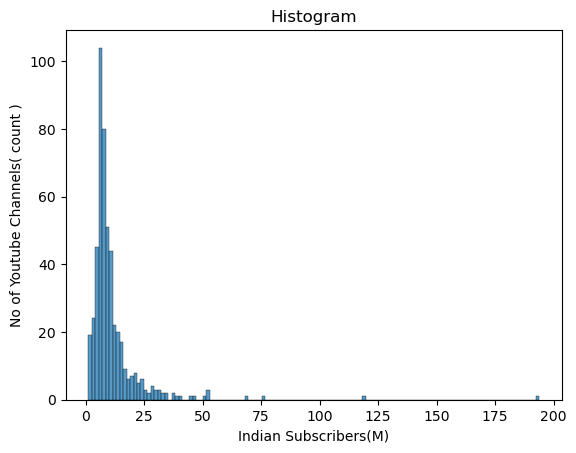

In [17]:
s.histplot(data['Indian Subscribers(M)'])
m.title('Histogram')
m.ylabel('No of Youtube Channels( count )')
m.show()

###  Youtube channels whose followers range between 10,000,000(i.e. 10 Million) to 50,000,000(i.e. 50 Million)

In [18]:
b=data[(data['Subscribers(M)']>=10.0) & (data['Subscribers(M)']<=50.0)]
b

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
15,15,16,sonymusicindiaVEVO,Music & Dance,45.6,34.1,17300.0,247.0,17.0
16,16,17,shemaroo,Music & Dance,45.4,36.9,114000.0,514.0,15.0
17,17,18,speedrecords,Music & Dance,42.1,37.1,19700.0,749.0,39.0
18,18,19,IshtarMusic,Music & Dance,40.2,32.2,47300.0,1800.0,23.0
19,19,20,GaaneSuneAnsune,Music & Dance,37.1,29.3,32800.0,240.0,10.0
...,...,...,...,...,...,...,...,...,...
254,254,255,DrishtiIASvideos,Education,10.0,9.9,16900.0,1300.0,91.0
255,255,256,DynamoGaming,Music & Dance,10.0,9.1,149400.0,16800.0,183.0
256,256,257,liveinsaan,Music & Dance,10.0,8.2,1300000.0,64400.0,1500.0
257,257,258,ambeycassettes,Music & Dance,10.0,9.8,13100.0,182.0,9.0


### Top Ten Youtube Channels in India (stats)

In [19]:
a=data.head(10)
a

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,1,2,SETIndia,Music & Dance,153.5,118.4,21100.0,215.0,13.0
2,2,3,zeemusiccompany,Music & Dance,93.7,76.3,64900.0,2200.0,55.0
3,3,4,GoldminesTelefilms,MoviesAnimation,83.6,68.1,58200.0,723.0,21.0
4,4,5,5MinuteCraftsYouTube,MoviesAnimation,79.4,22.1,245200.0,1500.0,56.0
5,5,6,SonySAB,MoviesAnimation,78.6,52.7,51800.0,699.0,33.0
6,6,7,BTS,Music & Dance,74.1,13.8,1000000.0,213300.0,7500.0
7,7,8,zeetv,Music & Dance,66.6,51.7,25000.0,276.0,3.0
8,8,9,filmigaane,Music & Dance,64.4,41.0,37000.0,373.0,17.0
9,9,10,colorstv,Music & Dance,60.8,27.2,6000.0,53.0,2.0


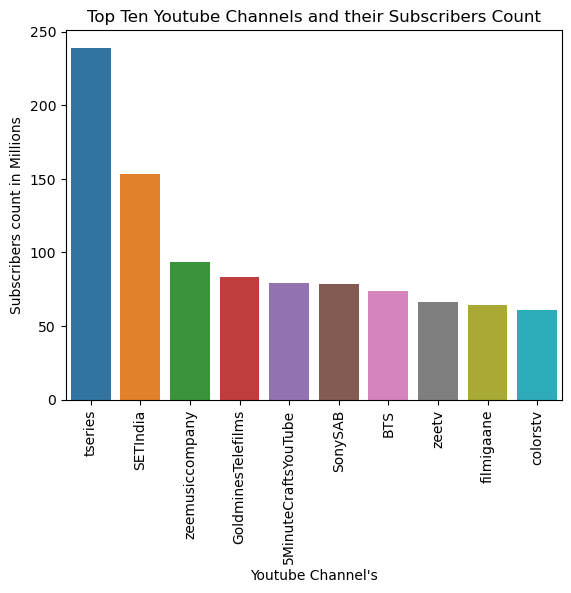

In [20]:
s.barplot(data=a,x='Youtube Channel',y='Subscribers(M)')
m.title('Top Ten Youtube Channels and their Subscribers Count')
m.ylabel('Subscribers count in Millions')
m.xlabel('Youtube Channel\'s')
m.xticks(rotation=90)
m.show()

<function matplotlib.pyplot.show(close=None, block=None)>

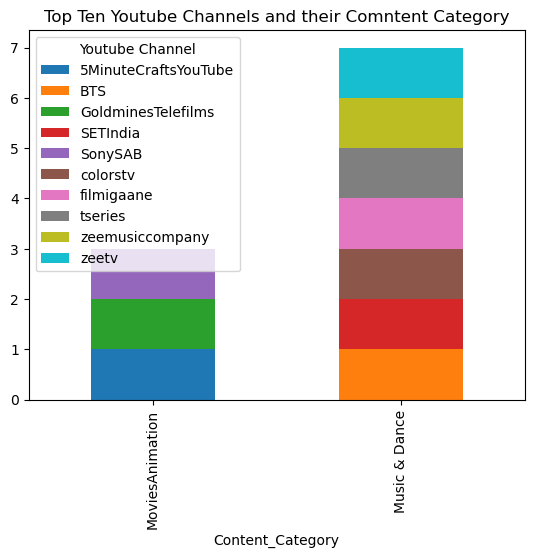

In [21]:
pd.crosstab(a['Content_Category'],a['Youtube Channel']).plot(kind='bar',stacked=True)
m.title('Top Ten Youtube Channels and their Comntent Category')
m.show

### Youtube channels whose content category is Music & Dance

In [22]:
a=data[data['Content_Category']=="Music & Dance"]
print(a.shape)
a



(152, 9)


,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,1,2,SETIndia,Music & Dance,153.5,118.4,21100.0,215.0,13.0
2,2,3,zeemusiccompany,Music & Dance,93.7,76.3,64900.0,2200.0,55.0
6,6,7,BTS,Music & Dance,74.1,13.8,1000000.0,213300.0,7500.0
7,7,8,zeetv,Music & Dance,66.6,51.7,25000.0,276.0,3.0
...,...,...,...,...,...,...,...,...,...
476,476,477,NDJMUSIC,Music & Dance,6.6,6.4,7900.0,301.0,23.0
477,477,478,badshahlive,Music & Dance,6.6,5.8,271500.0,23300.0,558.0
478,478,479,SKMusicWorks,Music & Dance,6.6,5.9,9000.0,95.0,8.0
492,492,493,IGtamil,Music & Dance,6.5,5.4,2900.0,79.0,1.0


<AxesSubplot:xlabel='Content_Category', ylabel='Subscribers(M)'>

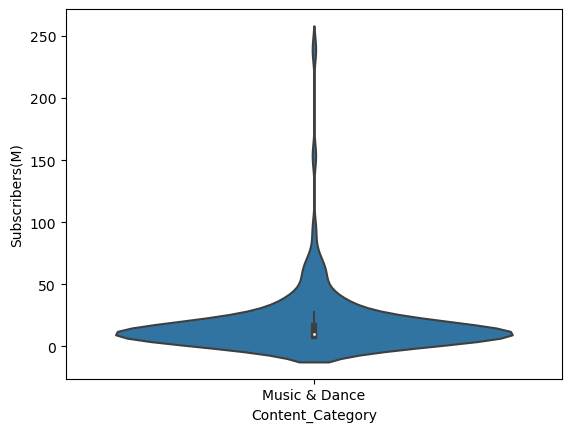

In [23]:
s.violinplot(x=a['Content_Category'],y=a['Subscribers(M)'])

### Type of Content that Youtubers are focusing to target the Audience

C:\ProgramData\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


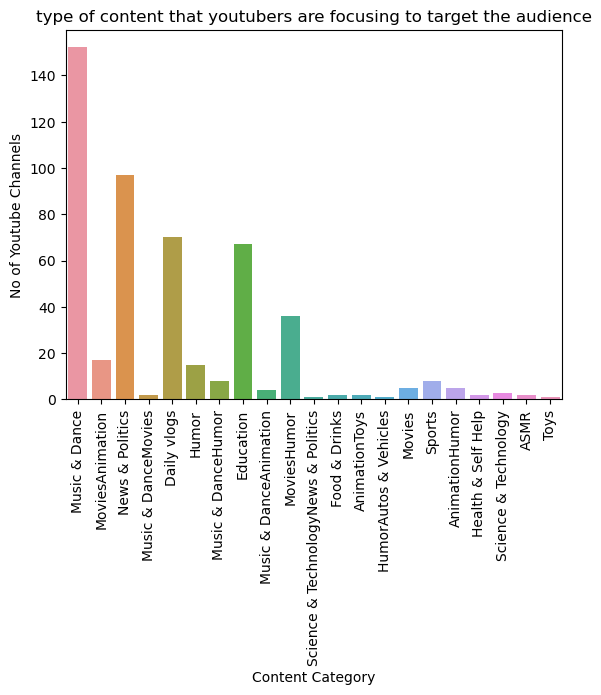

In [24]:
s.countplot(data['Content_Category'])
m.title('type of content that youtubers are focusing to target the audience')
m.ylabel('No of Youtube Channels')
m.xlabel('Content Category')
m.xticks(rotation=90)
m.show()

In [25]:
data['Content_Category'].value_counts()

Music & Dance                          152
News & Politics                         97
Daily vlogs                             70
Education                               67
MoviesHumor                             36
MoviesAnimation                         17
Humor                                   15
Music & DanceHumor                       8
Sports                                   8
Movies                                   5
AnimationHumor                           5
Music & DanceAnimation                   4
Science & Technology                     3
Music & DanceMovies                      2
Food & Drinks                            2
AnimationToys                            2
ASMR                                     2
Health & Self Help                       2
Science & TechnologyNews & Politics      1
HumorAutos & Vehicles                    1
Toys                                     1
Name: Content_Category, dtype: int64

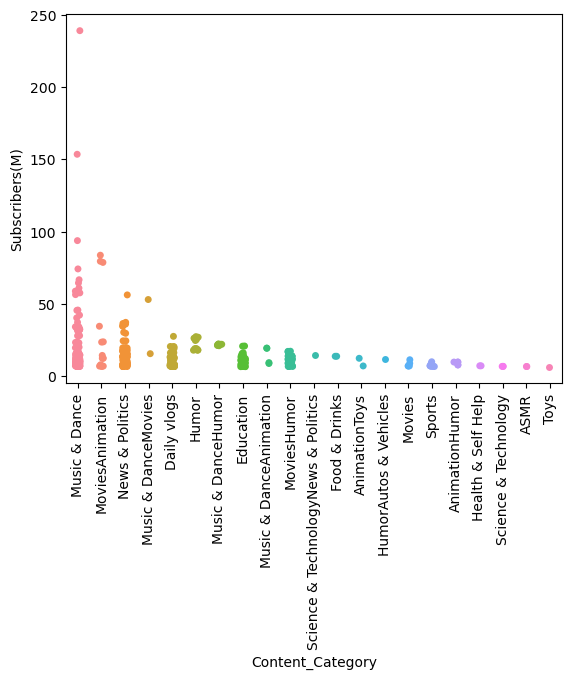

In [26]:
s.stripplot(x=data['Content_Category'],y=data['Subscribers(M)'])
m.xticks(rotation=90)
m.show()

### Top Five Content Category

In [27]:
data['Content_Category'].value_counts()


Music & Dance                          152
News & Politics                         97
Daily vlogs                             70
Education                               67
MoviesHumor                             36
MoviesAnimation                         17
Humor                                   15
Music & DanceHumor                       8
Sports                                   8
Movies                                   5
AnimationHumor                           5
Music & DanceAnimation                   4
Science & Technology                     3
Music & DanceMovies                      2
Food & Drinks                            2
AnimationToys                            2
ASMR                                     2
Health & Self Help                       2
Science & TechnologyNews & Politics      1
HumorAutos & Vehicles                    1
Toys                                     1
Name: Content_Category, dtype: int64

In [28]:
a=data[(data['Content_Category']=='Music & Dance')|(data['Content_Category']=='News & Politics') | (data['Content_Category']=='Education') | (data['Content_Category']=='Daily vlogs') | (data['Content_Category']=='MoviesHumor')]
a


,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,1,2,SETIndia,Music & Dance,153.5,118.4,21100.0,215.0,13.0
2,2,3,zeemusiccompany,Music & Dance,93.7,76.3,64900.0,2200.0,55.0
6,6,7,BTS,Music & Dance,74.1,13.8,1000000.0,213300.0,7500.0
7,7,8,zeetv,Music & Dance,66.6,51.7,25000.0,276.0,3.0
...,...,...,...,...,...,...,...,...,...
494,494,495,scoobytv-hindicomedy8463,Daily vlogs,6.5,5.3,72100.0,800.0,20.0
495,495,496,areyouhungry3512,Daily vlogs,6.5,5.9,390900.0,39700.0,177.0
496,496,497,Sunnewstamil,News & Politics,6.5,5.8,6400.0,63.0,4.0
497,497,498,SaregamaTVShowsTamil,Education,6.4,5.4,202900.0,3500.0,41.0


C:\ProgramData\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


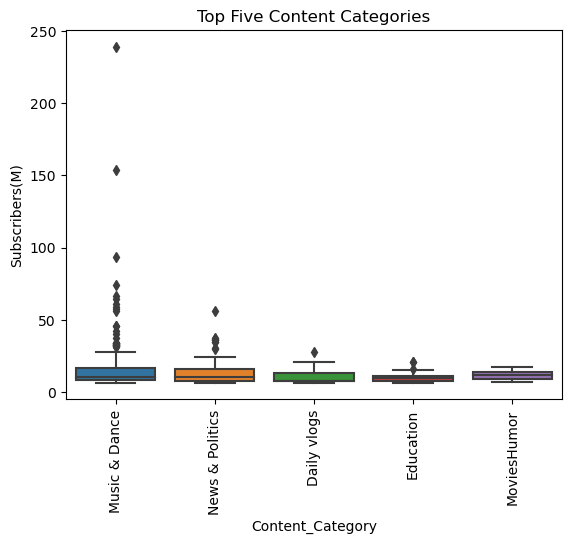

In [29]:
s.boxplot(a['Content_Category'],a['Subscribers(M)'])
m.xticks(rotation=90)
m.title('Top Five Content Categories')
m.show()


In [30]:
b=a['Content_Category'].value_counts()

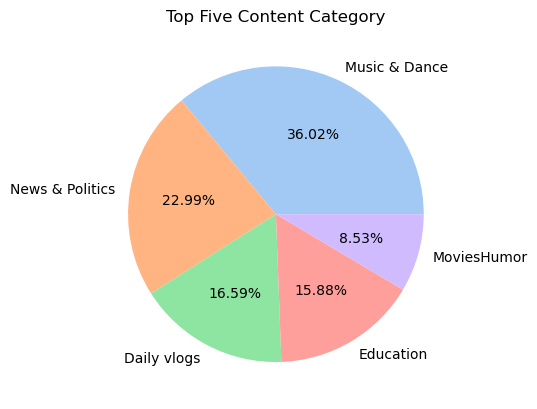

In [31]:
m.pie(a['Content_Category'].value_counts(),labels=b.index,colors=s.color_palette('pastel'),autopct='%.2f%%')
m.title('Top Five Content Category')
m.show()

### Comparing the Subscribers of 1st ranked & 250 ranked & 500 ranked Youtube channels

In [32]:
b=data[(data['Rank']==1) | (data['Rank']==250) | (data['Rank']==500)]
b

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
249,249,250,ClassicMrBean,News & Politics,10.2,1.9,57200.0,555.0,19.0
499,499,500,kayceerachelwonderland,Toys,6.4,1.6,6500000.0,165500.0,1300.0


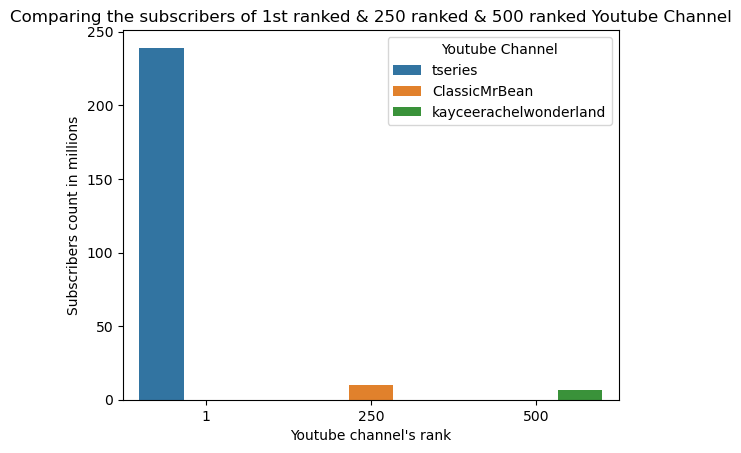

In [33]:
s.barplot(data=b,x='Rank',y='Subscribers(M)',hue='Youtube Channel')
m.title('Comparing the subscribers of 1st ranked & 250 ranked & 500 ranked Youtube Channel')
m.ylabel('Subscribers count in millions')
m.xlabel("Youtube channel's rank")
m.show()

### Youtube channel which is getting highest avg-views 

In [34]:
data.columns

Index(['Unnamed: 0', 'Rank', 'Youtube Channel', 'Content_Category',
       'Subscribers(M)', 'Indian Subscribers(M)', 'Avg-views', 'Avg-likes',
       'Avg-Comments'],
      dtype='object')

In [35]:
x=data.sort_values('Avg-views',ascending=False)
x[x['Avg-views']==x['Avg-views'].values.max()]

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
429,429,430,ManiMerajVines,Movies,6.9,6.5,12500000.0,479900.0,13200.0


In [36]:
x=data[(data['Rank']==1) | (data['Rank']==62)]
x.index=[0,1]
x

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,61,62,gulshankalra07,Music & DanceHumor,21.9,18.4,3700000.0,209500.0,261.0


In [37]:
a=x['Youtube Channel'];b=x['Avg-views']
def addlabels(a,b):
        for i in range(len(a)):
            m.text(i,b[i],b[i])

Text(0.5, 1.0, 'Comparing with Top Ranked Youtube Channel')

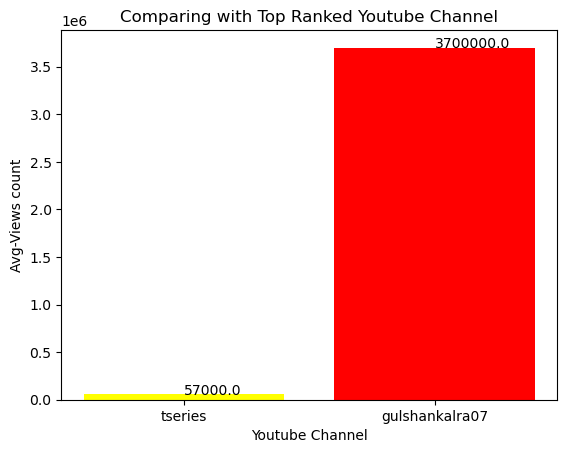

In [38]:
m.bar(x['Youtube Channel'],x['Avg-views'],color=['yellow','red'])
addlabels(a,b)
m.ylabel('Avg-Views count')
m.xlabel('Youtube Channel')
m.title('Comparing with Top Ranked Youtube Channel')

### Youtube channel which is getting highest avg-likes


In [39]:
y=data.sort_values('Avg-likes',ascending=False)
y[y['Avg-likes']==y['Avg-likes'].values.max()]

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
60,60,61,ShortsBreak_Official,Music & DanceHumor,21.9,20.5,9700000.0,517500.0,1100.0


In [40]:
x=data[(data['Rank']==1) | (data['Rank']==62)]
x.index=[0,1]
x

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,61,62,gulshankalra07,Music & DanceHumor,21.9,18.4,3700000.0,209500.0,261.0


In [41]:
a=x['Youtube Channel'];b=x['Avg-likes']
def addlabels(a,b):
        for i in range(len(a)):
            m.text(i,b[i],b[i])

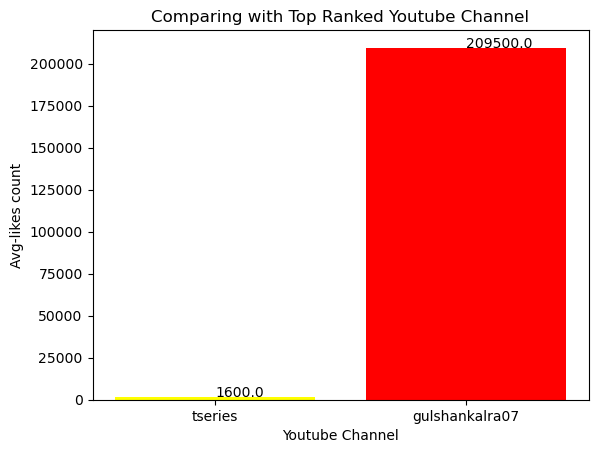

In [42]:
m.bar(x['Youtube Channel'],x['Avg-likes'],color=['yellow','red'])
addlabels(a,b)
m.ylabel('Avg-likes count')
m.xlabel('Youtube Channel')
m.title('Comparing with Top Ranked Youtube Channel')
m.show()

### Youtube channel which is getting highest avg-comments

In [43]:
z=data.sort_values('Avg-Comments',ascending=False)
z[z['Avg-Comments']==z['Avg-Comments'].values.max()]

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
73,73,74,EmiwayBantai,Music & Dance,19.7,17.4,4800000.0,439200.0,45600.0


In [44]:
x=data[(data['Rank']==1) | (data['Rank']==38)]
x.index=[0,1]
x

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,37,38,WorldwideRecordsBhojpuri,Music & Dance,31.0,29.8,58800.0,2000.0,44.0


In [45]:
a=x['Youtube Channel'];b=x['Avg-Comments']
def addlabels(a,b):
        for i in range(len(a)):
            m.text(i,b[i],b[i])

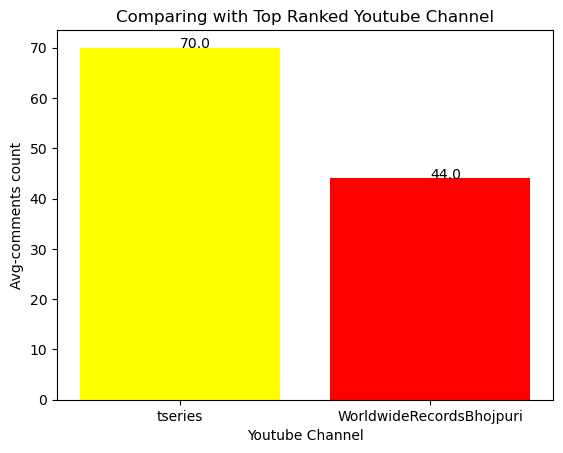

In [46]:
m.bar(x['Youtube Channel'],x['Avg-Comments'],color=['yellow','red'])
addlabels(a,b)
m.ylabel('Avg-comments count')
m.xlabel('Youtube Channel')
m.title('Comparing with Top Ranked Youtube Channel')
m.show()

### Comparing  Overall Subscribers v/s Indian Subscribers ( top 20 Youtuber channels)

In [47]:
data.head(20)

,Unnamed: 0,Rank,Youtube Channel,Content_Category,Subscribers(M),Indian Subscribers(M),Avg-views,Avg-likes,Avg-Comments
0,0,1,tseries,Music & Dance,239.1,193.9,57000.0,1600.0,70.0
1,1,2,SETIndia,Music & Dance,153.5,118.4,21100.0,215.0,13.0
2,2,3,zeemusiccompany,Music & Dance,93.7,76.3,64900.0,2200.0,55.0
3,3,4,GoldminesTelefilms,MoviesAnimation,83.6,68.1,58200.0,723.0,21.0
4,4,5,5MinuteCraftsYouTube,MoviesAnimation,79.4,22.1,245200.0,1500.0,56.0
5,5,6,SonySAB,MoviesAnimation,78.6,52.7,51800.0,699.0,33.0
6,6,7,BTS,Music & Dance,74.1,13.8,1000000.0,213300.0,7500.0
7,7,8,zeetv,Music & Dance,66.6,51.7,25000.0,276.0,3.0
8,8,9,filmigaane,Music & Dance,64.4,41.0,37000.0,373.0,17.0
9,9,10,colorstv,Music & Dance,60.8,27.2,6000.0,53.0,2.0


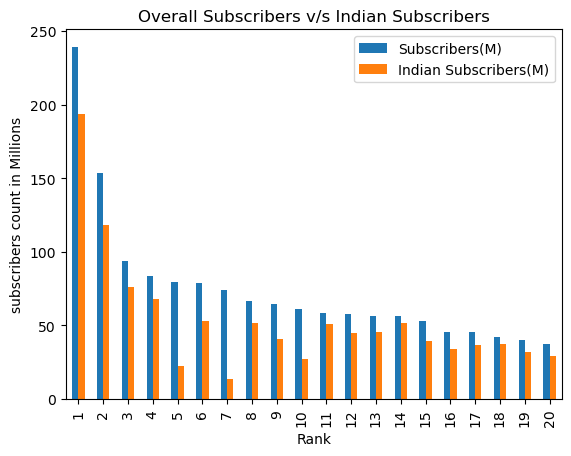

In [48]:
data.head(20).plot(kind='bar',x='Rank',y=['Subscribers(M)','Indian Subscribers(M)'])
m.xticks(rotation=90)
m.ylabel('subscribers count in Millions')
m.title('Overall Subscribers v/s Indian Subscribers')
m.show()


### DataFrame of TOP

In [49]:
a=data['Subscribers(M)'].values.max()
b=data['Indian Subscribers(M)'].values.max()
c=data['Avg-views'].values.max()
d=data['Avg-likes'].values.max()
e=data['Avg-Comments'].values.max()
f=data['Rank'].min()
g=data[data['Rank']==1]
h=g.iloc[(0,2)]
i=g.iloc[(0,3)]
j=data['Content_Category'].value_counts()
j['Music & Dance']

152

In [50]:
top=pd.DataFrame({'Top Ranked Youtube Channel':[h,np.nan],
              'Most used Content Category': [i,j['Music & Dance']],
              'Youtube Channel with highest Subscribers(M)':[h,a],
              'Youtube Channel with highest Indian Subscribers(M)':[h,b],
              'Youtube Channel with highest avg-views':['ShortsBreak_Official',c],
              'Youtube Channel with highest avg-likes':['ShortsBreak_Official',d],
              'Youtube Channel with highest avg-comments':['MRINDIANHACKER',e]},index=['Youtube channel name','count'])
top

,Top Ranked Youtube Channel,Most used Content Category,Youtube Channel with highest Subscribers(M),Youtube Channel with highest Indian Subscribers(M),Youtube Channel with highest avg-views,Youtube Channel with highest avg-likes,Youtube Channel with highest avg-comments
Youtube channel name,tseries,Music & Dance,tseries,tseries,ShortsBreak_Official,ShortsBreak_Official,MRINDIANHACKER
count,NaN,152,239.1,193.9,12500000.0,517500.0,45600.0


### Relationship btw Overall Subscribers & Indian Subscribers

C:\ProgramData\Anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


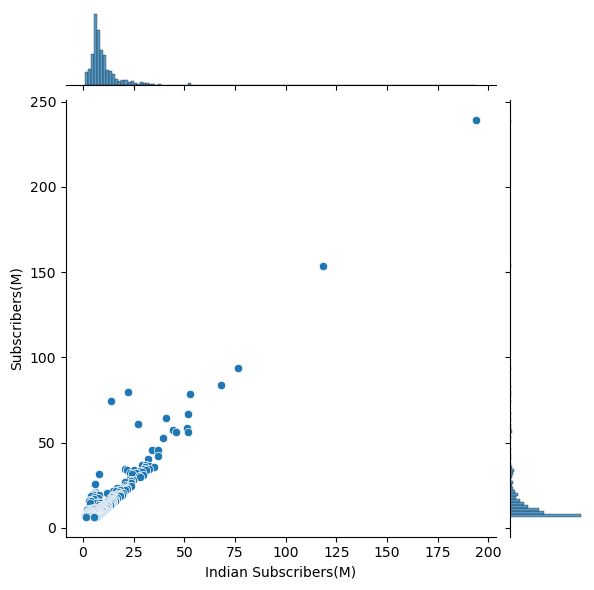

In [51]:
s.jointplot(data['Indian Subscribers(M)'],data['Subscribers(M)'])
m.xlabel('Indian Subscribers')
m.ylabel('Subscribers')
m.yticks(rotation=90)
m.show()


In [52]:
#correlation
data['Indian Subscribers(M)'].corr(data['Subscribers(M)'])

0.9522591436216931

<AxesSubplot:>

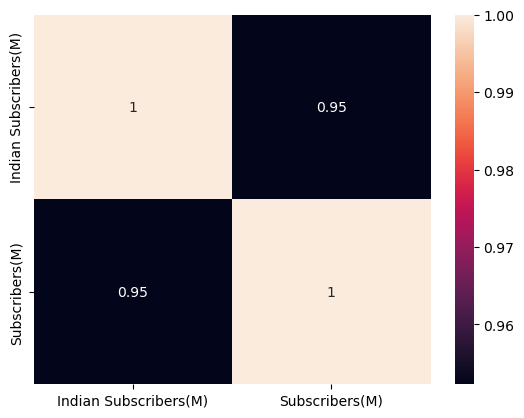

In [53]:
s.heatmap(data[['Indian Subscribers(M)','Subscribers(M)']].corr(),annot=True)

### Relationship btw avg-views,avg-likes & avg-comments

In [54]:
data.columns

Index(['Unnamed: 0', 'Rank', 'Youtube Channel', 'Content_Category',
       'Subscribers(M)', 'Indian Subscribers(M)', 'Avg-views', 'Avg-likes',
       'Avg-Comments'],
      dtype='object')

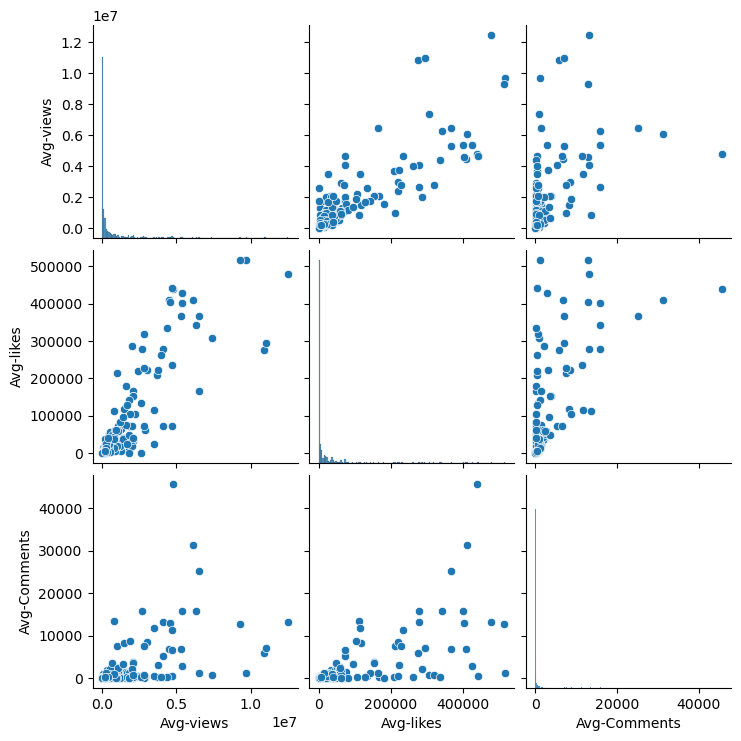

In [55]:
s.pairplot(data=data,vars=['Avg-views','Avg-likes','Avg-Comments'])

In [56]:
#correlation
data[['Avg-views','Avg-likes','Avg-Comments']].corr()

,Avg-views,Avg-likes,Avg-Comments
Avg-views,1.000000,0.882368,0.588465
Avg-likes,0.882368,1.000000,0.684480
Avg-Comments,0.588465,0.684480,1.000000


<AxesSubplot:>

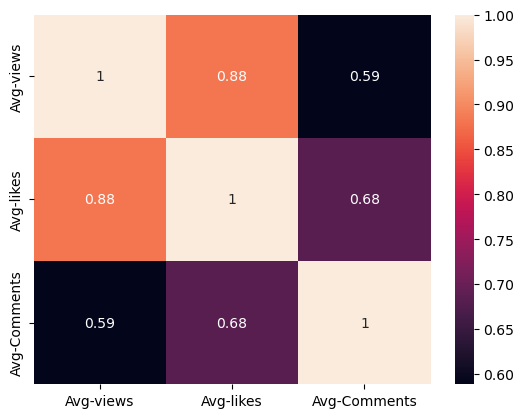

In [57]:
s.heatmap(data[['Avg-views','Avg-likes','Avg-Comments']].corr(),annot=True)

### Audience Interested Content

### Subscribers count for  Individual Content_Category

In [58]:
data.columns

Index(['Unnamed: 0', 'Rank', 'Youtube Channel', 'Content_Category',
       'Subscribers(M)', 'Indian Subscribers(M)', 'Avg-views', 'Avg-likes',
       'Avg-Comments'],
      dtype='object')

In [59]:
b=pd.pivot_table(data,index='Content_Category',values=('Subscribers(M)'),aggfunc={'Subscribers(M)':sum})
b

,Subscribers(M)
Content_Category,
ASMR,13.0
AnimationHumor,44.0
AnimationToys,19.1
Daily vlogs,734.8
Education,651.0
Food & Drinks,27.2
Health & Self Help,14.0
Humor,320.6
HumorAutos & Vehicles,11.4


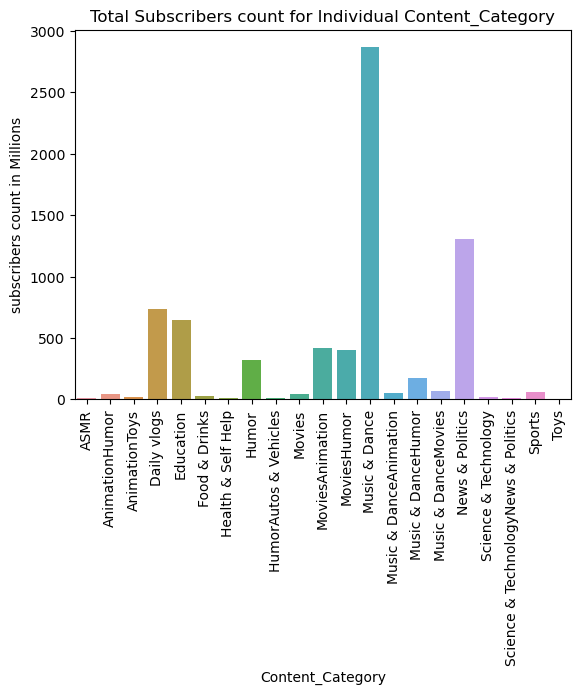

In [60]:
s.barplot(x=b.index,y=b['Subscribers(M)'])
m.title('Total Subscribers count for Individual Content_Category')
m.xticks(rotation=90)
m.ylabel('subscribers count in Millions')
m.show()